<a href="https://colab.research.google.com/github/hoanganhloan172/Covid_19_analysis_by_PHA_DTD/blob/main/BTL%20CU%E1%BB%90I%20K%C3%8C/b%C3%A0i_t%E1%BA%ADp_l%E1%BB%9Bn_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#đọc dữ liệu từ file csv
data = pd.read_csv('/content/owid-covid-data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380405 entries, 0 to 380404
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    380405 non-null  object 
 1   continent                                   362192 non-null  object 
 2   location                                    380405 non-null  object 
 3   date                                        380405 non-null  object 
 4   total_cases                                 341501 non-null  float64
 5   new_cases                                   369504 non-null  float64
 6   new_cases_smoothed                          368274 non-null  float64
 7   total_deaths                                319445 non-null  float64
 8   new_deaths                                  369785 non-null  float64
 9   new_deaths_smoothed                         368555 non-null  float64
 

In [ ]:
#xóa các cột không cần thiết
columns_to_drop = ['iso_code', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million']
data = data.drop(columns=columns_to_drop)
data.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# Thay thế các giá trị thiếu bằng giá trị trung bình của cột
data.fillna(data.mean(), inplace=True)
data.head(5)

<ipython-input-47-43fca7e8f274>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-05,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
1,Asia,Afghanistan,2020-01-06,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
2,Asia,Afghanistan,2020-01-07,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
3,Asia,Afghanistan,2020-01-08,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
4,Asia,Afghanistan,2020-01-09,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469


In [ ]:
#tóm tắt, tổng quan về dữ liệu
data.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.804050e+05,3.804050e+05,3.804050e+05,380405.000000,380405.000000,380405.000000,380405.000000,380405.000000,380405.000000,380405.000000,...,380405.000000,380405.000000,380405.000000,380405.000000,380405.000000,3.804050e+05,3.804050e+05,380405.000000,380405.000000,380405.000000
mean,7.265074e+06,8.886025e+03,8.926343e+04,79.520708,110505.866669,134.951139,910.194825,0.841796,0.911495,669.725988,...,32.909181,50.790394,3.097467,73.713693,0.722592,1.292451e+08,5.460576e+04,9.752607,10.984338,1769.376469
std,4.115186e+07,2.383986e+05,4.158170e+05,1417.277421,150246.291318,1535.809703,1032.064464,7.267755,0.278757,685.606552,...,10.288516,19.702155,2.109795,7.096110,0.129285,6.633481e+08,2.809752e+04,2.223025,4.561349,368.954347
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,1.194500e+04,0.000000e+00,1.860000e+02,0.000000,3857.559000,0.000000,96.540000,0.000000,0.911495,669.725988,...,30.000000,50.790394,1.710000,70.390000,0.665000,4.490020e+05,5.460576e+04,9.752607,10.984338,1769.376469
50%,1.356260e+05,0.000000e+00,3.190000e+03,0.000000,53980.679000,0.000000,726.717000,0.000000,0.911495,669.725988,...,32.909181,50.790394,3.097467,74.250000,0.722592,5.882259e+06,5.460576e+04,9.752607,10.984338,1769.376469
75%,1.965481e+06,0.000000e+00,7.960000e+04,0.000000,128814.245000,0.000000,1162.937000,0.000000,0.940000,669.725988,...,34.800000,50.790394,3.097467,78.930000,0.806000,2.830170e+07,5.460576e+04,9.752607,10.984338,1769.376469
max,7.746994e+08,4.423623e+07,7.033430e+06,103719.000000,764359.624000,240325.866000,6482.193000,906.413000,5.870000,28891.000000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.327828e+06,76.620000,377.700000,10293.515000


In [ ]:
# Chuyển đổi định dạng của cột "date" thành kiểu datetime
data['date'] = pd.to_datetime(data['date'])
data.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-05,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
1,Asia,Afghanistan,2020-01-06,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
2,Asia,Afghanistan,2020-01-07,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
3,Asia,Afghanistan,2020-01-08,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469
4,Asia,Afghanistan,2020-01-09,7.265074e+06,0.0,89263.4304,0.0,110505.866669,0.0,910.194825,...,32.909181,37.746,0.5,64.83,0.511,41128772.0,54605.762814,9.752607,10.984338,1769.376469


In [ ]:
#tạo bộ dữ liệu cho khu vực châu á
data_asia = data.loc[data['continent'] == 'Asia']

# In ra 5 dòng đầu tiên của dữ liệu cho kv châu á
print(data_asia.head(5))

  continent     location       date   total_cases  new_cases  total_deaths  \
0      Asia  Afghanistan 2020-01-05  7.265074e+06        0.0    89263.4304   
1      Asia  Afghanistan 2020-01-06  7.265074e+06        0.0    89263.4304   
2      Asia  Afghanistan 2020-01-07  7.265074e+06        0.0    89263.4304   
3      Asia  Afghanistan 2020-01-08  7.265074e+06        0.0    89263.4304   
4      Asia  Afghanistan 2020-01-09  7.265074e+06        0.0    89263.4304   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0         0.0            110505.866669                    0.0   
1         0.0            110505.866669                    0.0   
2         0.0            110505.866669                    0.0   
3         0.0            110505.866669                    0.0   
4         0.0            110505.866669                    0.0   

   total_deaths_per_million  ...  male_smokers  handwashing_facilities  \
0                910.194825  ...     32.909181                  37

In [ ]:
#số ca nhiễm trung bình tại kv châu á
mean_new_cases_asia = data_asia['new_cases'].mean()

print("Số ca nhiễm mới trung bình mỗi ngày khu vực châu á là:", mean_new_cases_asia)

Số ca nhiễm mới trung bình mỗi ngày khu vực châu á là: 4528.285883136999


In [ ]:
#tổng số ca nhiễm khu vực châu á
total_cases_asia = data_asia['total_cases'].max()
#tổng số ca tử vong khu vực châu á
total_deaths_asia = data_asia['total_deaths'].max()

print("Tổng số ca nhiễm khu vực châu á là:", total_cases_asia)
print("Tổng số ca tử vong khu vực châu á là:", total_deaths_asia)

# Tính mức tăng hàng ngày về số ca nhiễm và số ca tử vong
new_cases_asia = data_asia['new_cases'].mean()
new_deaths_asia = data_asia['new_deaths'].mean()

print("Mức tăng hàng ngày về số ca nhiễm kv châu á là:", new_cases_asia)
print("Mức tăng hàng ngày về số ca tử vong kv châu á là:", new_deaths_asia)

Tổng số ca nhiễm khu vực châu á là: 99331724.0
Tổng số ca tử vong khu vực châu á là: 533472.0
Mức tăng hàng ngày về số ca nhiễm kv châu á là: 4528.285883136999
Mức tăng hàng ngày về số ca tử vong kv châu á là: 26.411466340999016


<ipython-input-66-aee5b7e34c23>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_data['date'] = pd.to_datetime(asia_data['date'])


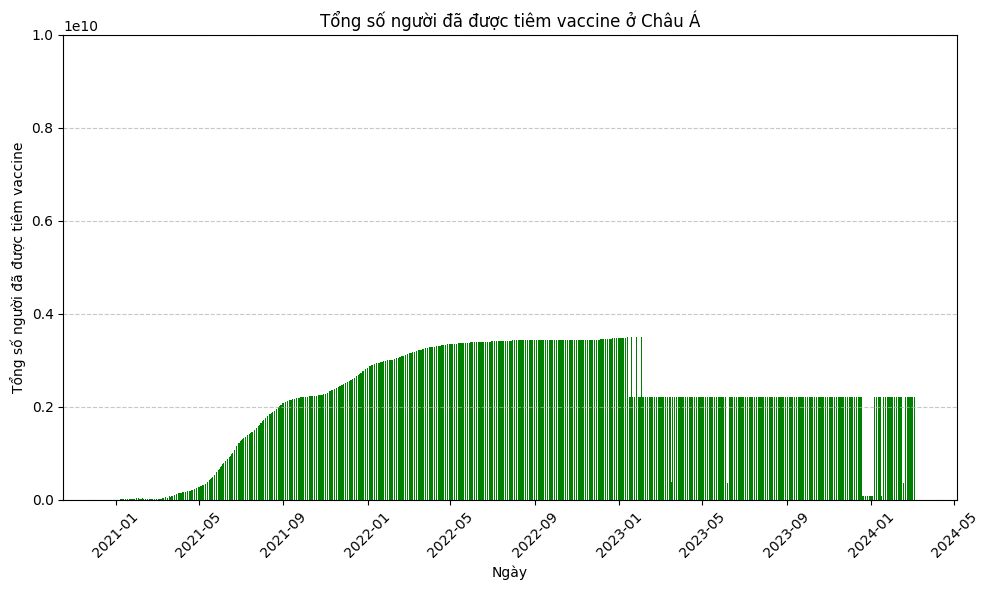

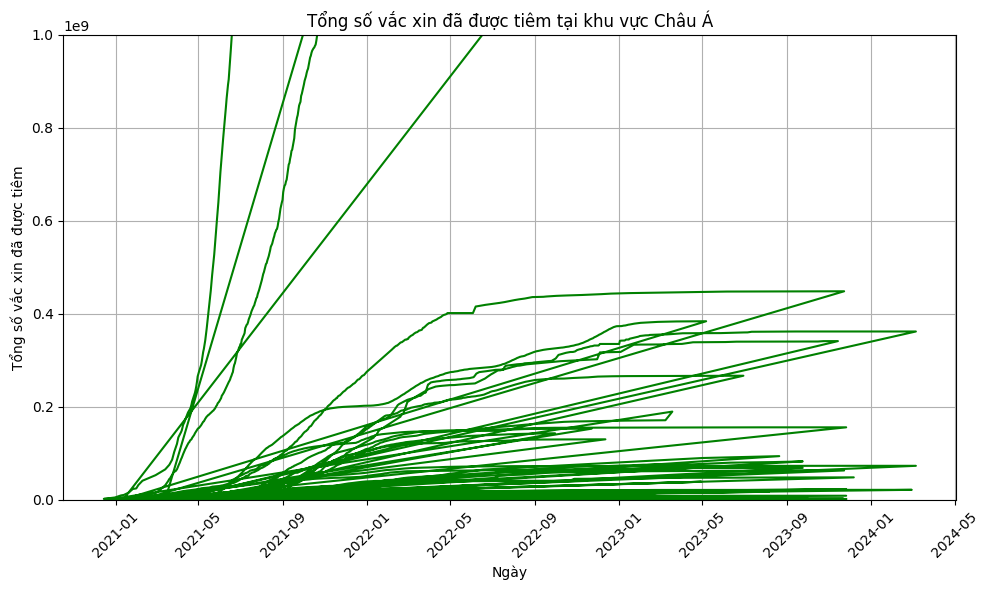

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của khu vực Châu Á
asia_data = data[data['continent'] == 'Asia']

# Chuyển cột 'date' sang kiểu datetime
asia_data['date'] = pd.to_datetime(asia_data['date'])

# Lấy thông tin về tổng số người đã được tiêm vaccine
total_vaccinations_asia = asia_data[['date', 'total_vaccinations']].dropna()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(total_vaccinations_asia['date'], total_vaccinations_asia['total_vaccinations'], color='green', width=0.7)
plt.title('Tổng số người đã được tiêm vaccine ở Châu Á')
plt.xlabel('Ngày')
plt.ylabel('Tổng số người đã được tiêm vaccine')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1e10)  # Giới hạn trục y lên 1e10
plt.tight_layout()
plt.show()


# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(total_vaccinations_asia['date'], total_vaccinations_asia['total_vaccinations'], color='green')
plt.title('Tổng số vắc xin đã được tiêm tại khu vực Châu Á')
plt.xlabel('Ngày')
plt.ylabel('Tổng số vắc xin đã được tiêm')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 1e9)  # Giới hạn trục y lên 1e10
plt.tight_layout()
plt.show()




<ipython-input-53-e8c3552bd6c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_data['date'] = pd.to_datetime(asia_data['date'])


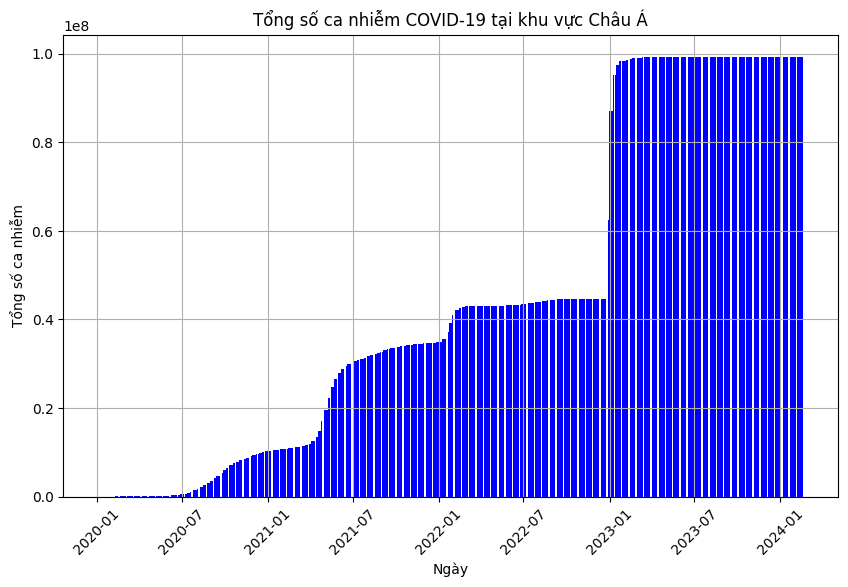

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của khu vực Châu Á
asia_data = data[data['continent'] == 'Asia']

# Chuyển cột 'date' sang kiểu datetime
asia_data['date'] = pd.to_datetime(asia_data['date'])

# Lấy thông tin về tổng số ca nhiễm
total_cases_asia = asia_data[['date', 'total_cases']].dropna()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(total_cases_asia['date'], total_cases_asia['total_cases'], color='blue')
plt.title('Tổng số ca nhiễm COVID-19 tại khu vực Châu Á')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



<ipython-input-54-668347cbcf09>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_data['date'] = pd.to_datetime(asia_data['date'])


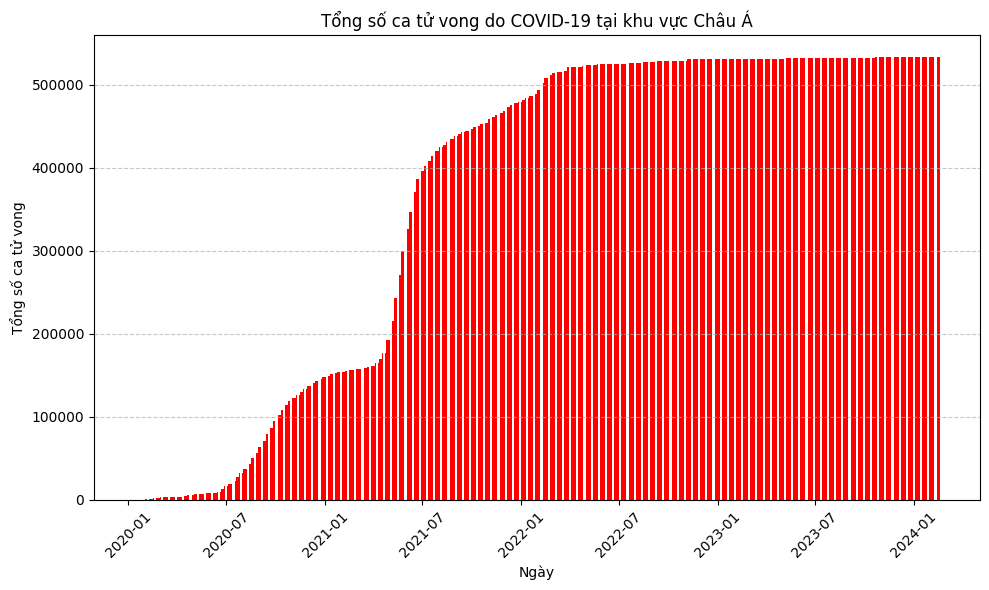

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của khu vực Châu Á
asia_data = data[data['continent'] == 'Asia']

# Chuyển cột 'date' sang kiểu datetime
asia_data['date'] = pd.to_datetime(asia_data['date'])

# Lấy thông tin về tổng số ca tử vong
total_deaths_asia = asia_data[['date', 'total_deaths']].dropna()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(total_deaths_asia['date'], total_deaths_asia['total_deaths'], color='red', width=0.7)
plt.title('Tổng số ca tử vong do COVID-19 tại khu vực Châu Á')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca tử vong')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



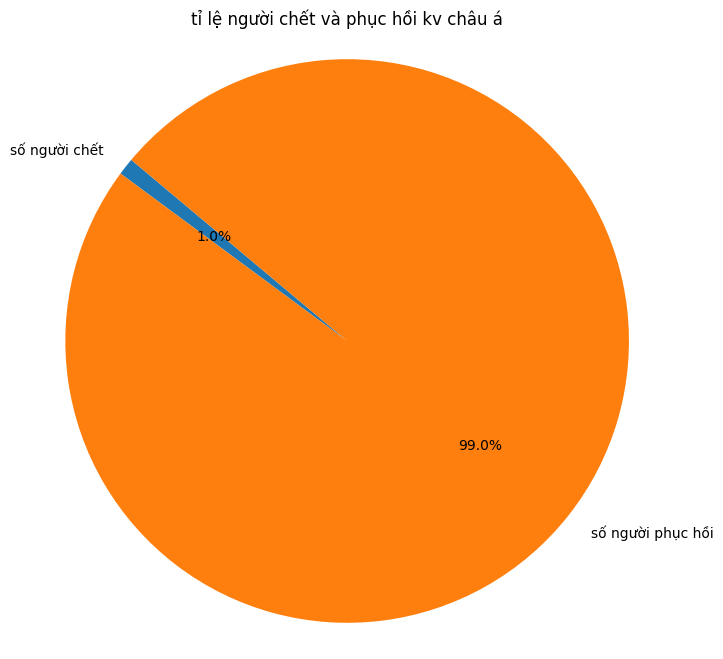

In [ ]:
import numpy as np
# Tính số ca hồi phục kv châu á
total_recovered_asia = data_asia['total_cases'].sum() - data_asia['total_deaths'].sum()
#tỉ lệ số ca tử vong, số ca hồi phục so với số ca nhiễm
percent_recover =  (total_recovered_asia / data_asia['total_cases'].sum()) *100
percent_deaths = (data_asia['total_deaths'].sum() / data_asia['total_cases'].sum()) *100
sizes = [percent_deaths, percent_recover]  # Phần trăm của mỗi phần
labels = ['số người chết', 'số người phục hồi',]  # Nhãn tương ứng với mỗi phần

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # startangle để xoay biểu đồ
plt.title('tỉ lệ người chết và phục hồi kv châu á')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

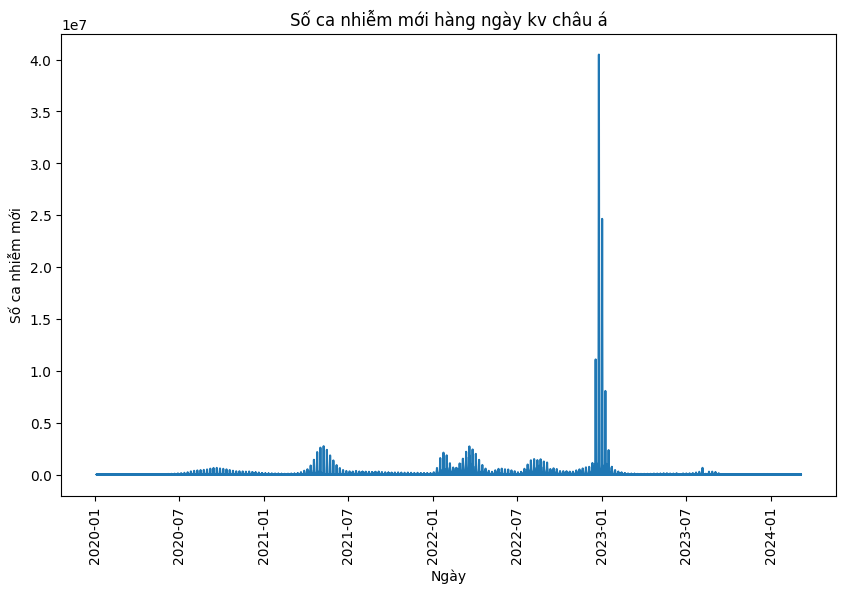

In [ ]:
# Tạo biểu đồ đường thể hiện số ca nhiễm mới hàng ngày kv châu á
plt.figure(figsize=(10, 6))
plt.plot(data_asia['date'], data_asia['new_cases'])
plt.title('Số ca nhiễm mới hàng ngày kv châu á')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.xticks(rotation=90)
plt.show()


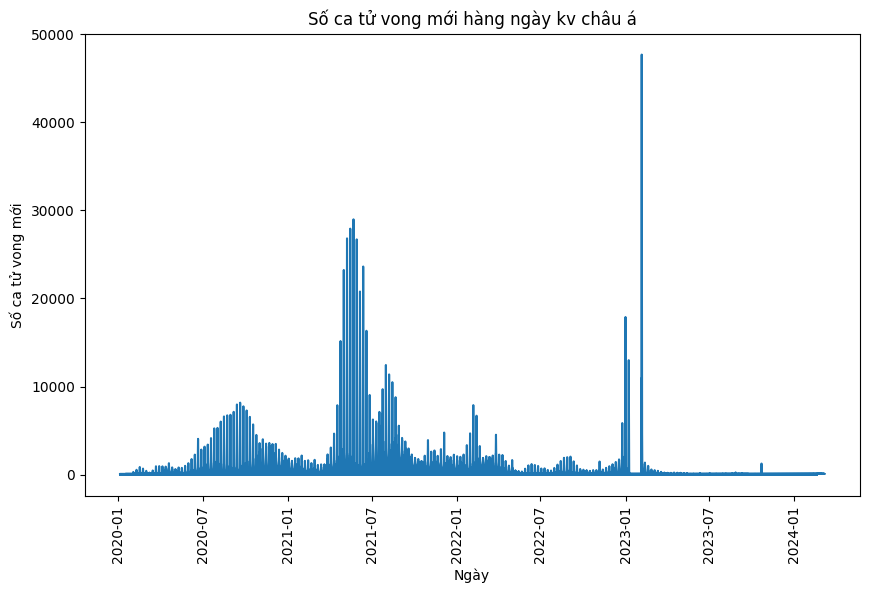

In [ ]:
# Tạo biểu đồ đường thể hiện số ca tử vong mới hàng ngày kv châu á
plt.figure(figsize=(10, 6))
plt.plot(data_asia['date'], data_asia['new_deaths'])
plt.title('Số ca tử vong mới hàng ngày kv châu á')
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong mới')
plt.xticks(rotation=90)
plt.show()

<ipython-input-43-6534700a0909>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])


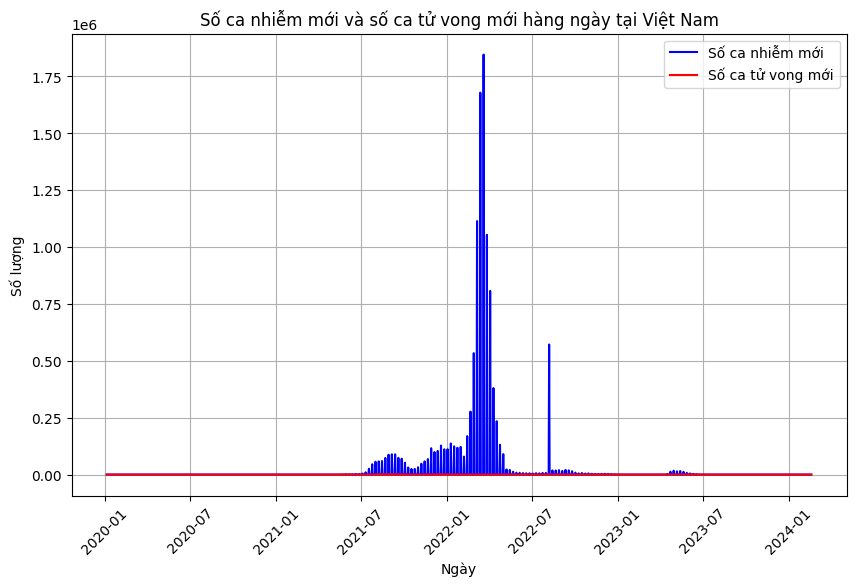

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Chuyển cột 'date' sang kiểu datetime
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])

# Tạo biểu đồ
plt.figure(figsize=(10, 6))

# Biểu đồ số ca nhiễm mới hàng ngày
plt.plot(vietnam_data['date'], vietnam_data['new_cases'], color='blue', label='Số ca nhiễm mới')

# Biểu đồ số ca tử vong mới hàng ngày
plt.plot(vietnam_data['date'], vietnam_data['new_deaths'], color='red', label='Số ca tử vong mới')

plt.title('Số ca nhiễm mới và số ca tử vong mới hàng ngày tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Số lượng')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-84-bd2e71ffa32b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])


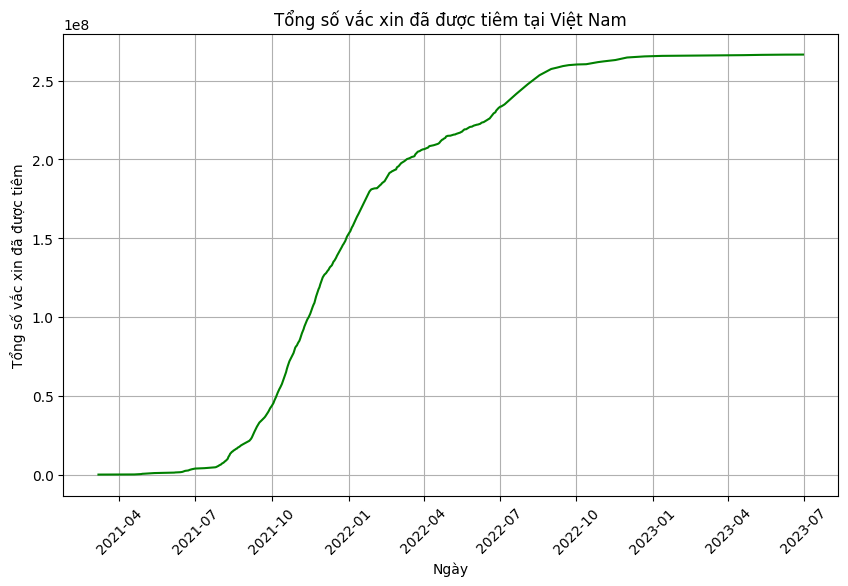

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Chuyển cột 'date' sang kiểu datetime
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])

# Lấy thông tin về tổng số người đã được tiêm vaccine
total_vaccinations = vietnam_data[['date', 'total_vaccinations']].dropna()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(total_vaccinations['date'], total_vaccinations['total_vaccinations'], color='green')
plt.title('Tổng số vắc xin đã được tiêm tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Tổng số vắc xin đã được tiêm')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Tính tổng số người được tiêm vaccine COVID-19 tại Việt Nam
total_vaccinations = vietnam_data['total_vaccinations'].max()

print("Tổng số vắc xin COVID-19 tại Việt Nam là:", total_vaccinations)


Tổng số vắc xin COVID-19 tại Việt Nam là: 266492149.0


In [ ]:
#tổng số ca nhiễm tại Việt Nam
total_cases_vn = vietnam_data['total_cases'].max()
#tổng số ca tử vong khu vực châu á
total_deaths_vn = vietnam_data['total_deaths'].max()

print("Tổng số ca nhiễm tại Việt Nam là:", total_cases_vn)
print("Tổng số ca tử vong tại Việt Nam là:", total_deaths_vn)

# Tính mức tăng hàng ngày về số ca nhiễm và số ca tử vong
new_cases_vn = vietnam_data['new_cases'].mean()
new_deaths_vn = vietnam_data['new_deaths'].mean()

print("Mức tăng hàng ngày về số ca nhiễm tại Việt Nam là:", new_cases_vn)
print("Mức tăng hàng ngày về số ca tử vong tại Việt Nam là:", new_deaths_vn)

Tổng số ca nhiễm tại Việt Nam là: 11624000.0
Tổng số ca tử vong tại Việt Nam là: 43206.0
Mức tăng hàng ngày về số ca nhiễm tại Việt Nam là: 7718.459495351925
Mức tăng hàng ngày về số ca tử vong tại Việt Nam là: 28.689243027888445


<ipython-input-49-62844495737e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])


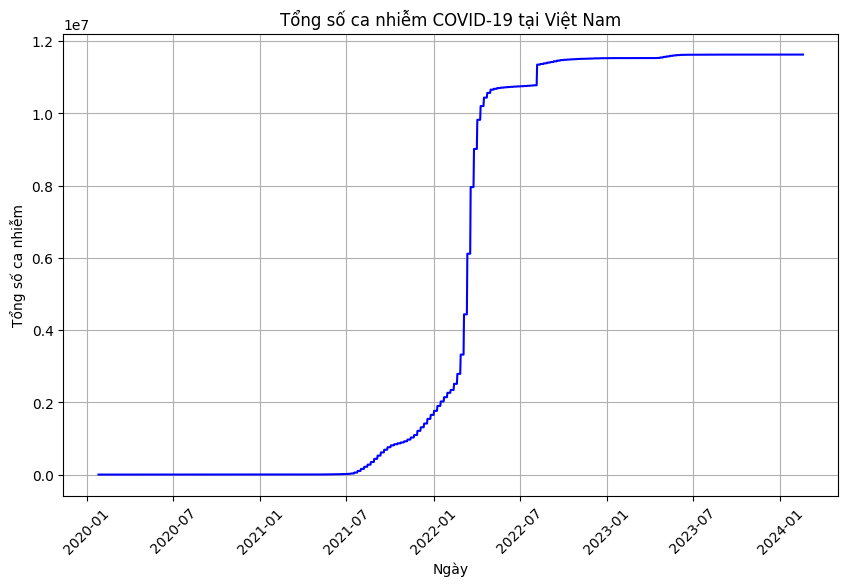

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Chuyển cột 'date' sang kiểu datetime
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])

# Lấy thông tin về tổng số ca nhiễm
total_cases = vietnam_data[['date', 'total_cases']].dropna()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(total_cases['date'], total_cases['total_cases'], color='blue')
plt.title('Tổng số ca nhiễm COVID-19 tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-50-330517a27c5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])


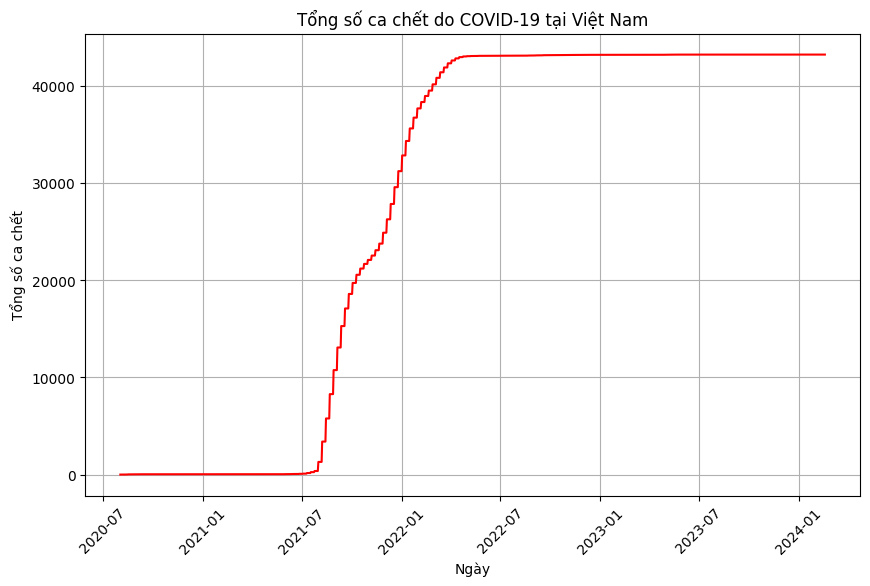

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Chuyển cột 'date' sang kiểu datetime
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])

# Lấy thông tin về tổng số ca chết
total_deaths = vietnam_data[['date', 'total_deaths']].dropna()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(total_deaths['date'], total_deaths['total_deaths'], color='red')
plt.title('Tổng số ca chết do COVID-19 tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca chết')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-9-4c0ccf3dd18d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_data['new_cases'] = vietnam_data['total_cases'].diff()


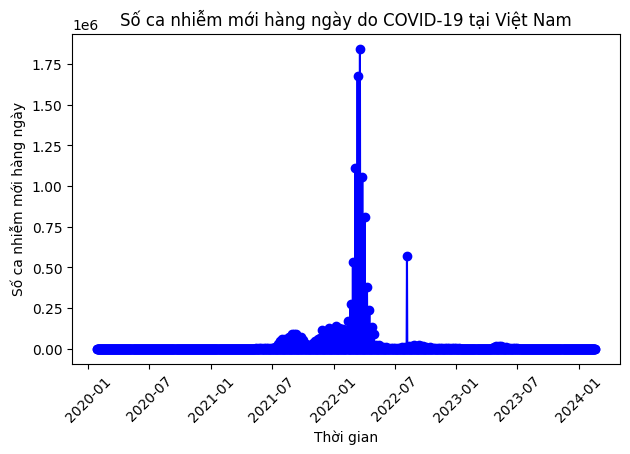

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location'] == 'Vietnam']

# Tính số ca nhiễm mới hàng ngày bằng cách lấy hiệu của số ca nhiễm total_cases
# từ ngày trước và ngày hiện tại
vietnam_data['new_cases'] = vietnam_data['total_cases'].diff()

# Lấy thông tin về ngày và số ca nhiễm mới hàng ngày
dates = pd.to_datetime(vietnam_data['date'])
new_cases = vietnam_data['new_cases']

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.plot(dates, new_cases, color='blue', marker='o', linestyle='-')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Số ca nhiễm mới hàng ngày')
ax.set_title('Số ca nhiễm mới hàng ngày do COVID-19 tại Việt Nam')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.tight_layout()  # Đảm bảo không bị cắt những thông tin trên biểu đồ
plt.show()


In [ ]:
# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu của Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Tìm số ca nhiễm COVID-19 lớn nhất trong một ngày
max_daily_cases = vietnam_data['new_cases'].max()

print("Số ca nhiễm COVID-19 lớn nhất trong một ngày ở Việt Nam là:", max_daily_cases)


Số ca nhiễm COVID-19 lớn nhất trong một ngày ở Việt Nam là: 1845400.0


<ipython-input-10-1ca721d6093a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_data['new_deaths'] = vietnam_data['total_deaths'].diff()


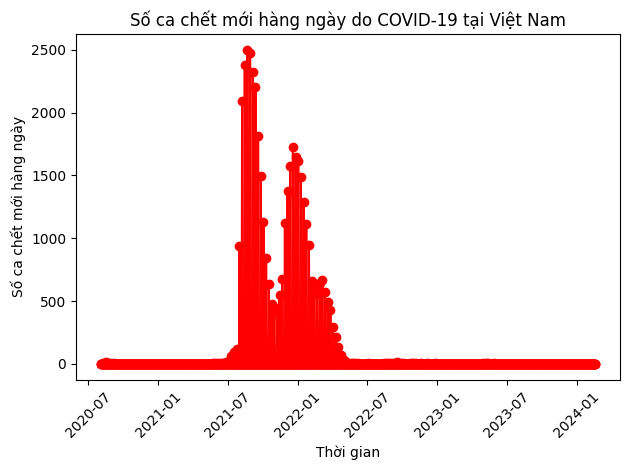

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV và lọc dữ liệu của Việt Nam
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location'] == 'Vietnam']

# Tính số ca chết mới hàng ngày bằng cách lấy hiệu của số ca chết total_deaths
# từ ngày trước và ngày hiện tại
vietnam_data['new_deaths'] = vietnam_data['total_deaths'].diff()

# Lấy thông tin về ngày và số ca chết mới hàng ngày
dates = pd.to_datetime(vietnam_data['date'])
new_deaths = vietnam_data['new_deaths']

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.plot(dates, new_deaths, color='red', marker='o', linestyle='-')
ax.xaxis_date()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Số ca chết mới hàng ngày')
ax.set_title('Số ca chết mới hàng ngày do COVID-19 tại Việt Nam')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.tight_layout()  # Đảm bảo không bị cắt những thông tin trên biểu đồ
plt.show()


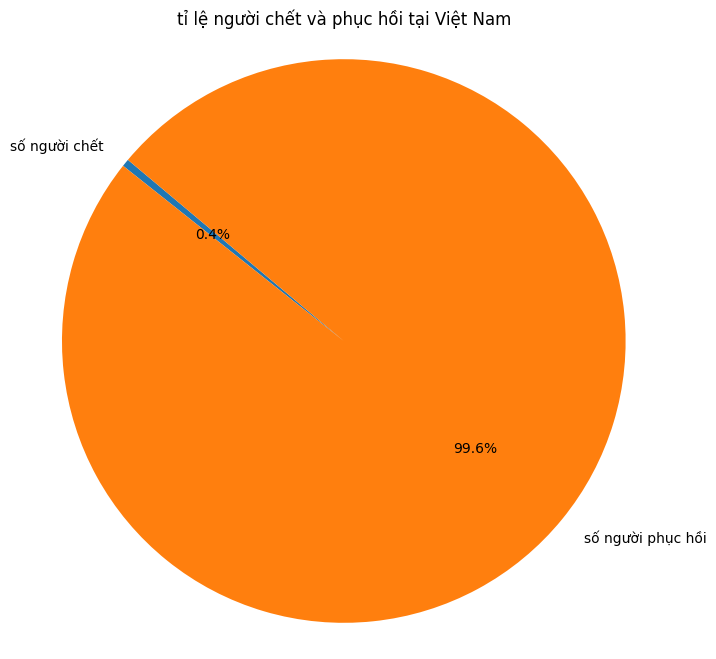

In [ ]:
import numpy as np
# Tính số ca hồi phục của Việt Nam
total_recovered_vn = vietnam_data['total_cases'].sum() - vietnam_data['total_deaths'].sum()
#tỉ lệ số ca tử vong, số ca hồi phục so với số ca nhiễm
percent_recover_vn =  (total_recovered_vn / vietnam_data['total_cases'].sum()) *100
percent_deaths_vn = (vietnam_data['total_deaths'].sum() / vietnam_data['total_cases'].sum()) *100
sizes = [percent_deaths_vn, percent_recover_vn]  # Phần trăm của mỗi phần
labels = ['số người chết', 'số người phục hồi',]  # Nhãn tương ứng với mỗi phần

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # startangle để xoay biểu đồ
plt.title('tỉ lệ người chết và phục hồi tại Việt Nam')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

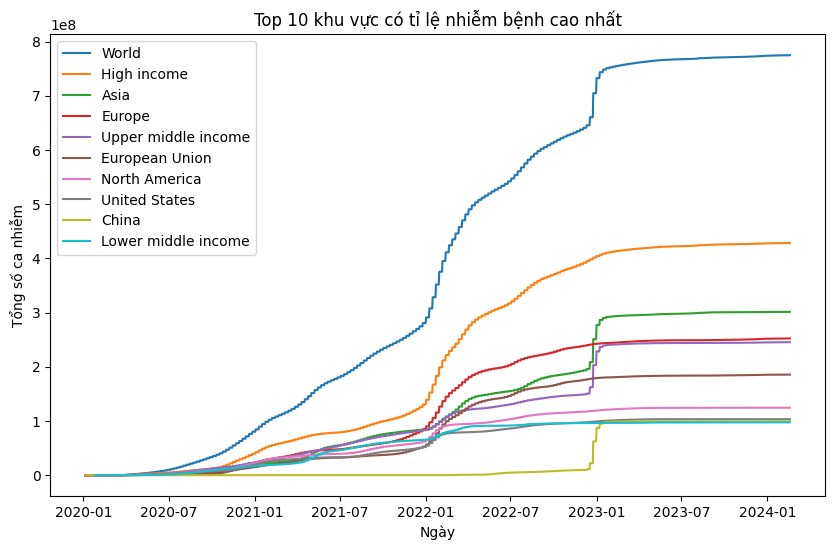

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin owid-covid-data.csv vào DataFrame
df = pd.read_csv('owid-covid-data.csv')
df["date"] = pd.to_datetime(df["date"])
# Nhóm các quốc gia theo số ca nhiễm và lấy 10 quốc gia đầu tiên
top_10_countries = df.groupby('location')['total_cases'].max().nlargest(10).index.tolist()

# Lọc dữ liệu cho 10 quốc gia này và vẽ biểu đồ
df_top_10 = df[df['location'].isin(top_10_countries)]
fig,ax = plt.subplots(figsize=(10, 6))
for country in top_10_countries:
    data = df_top_10[df_top_10['location'] == country]
    ax.plot(data['date'], data['total_cases'], label=country)
ax.legend()
ax.set_xlabel('Ngày')
ax.set_ylabel('Tổng số ca nhiễm')
ax.set_title('Top 10 khu vực có tỉ lệ nhiễm bệnh cao nhất')
plt.show()

In [ ]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Tính tỉ lệ tử vong (death rate) cho mỗi quốc gia
data['death_rate'] = data['total_deaths'] / data['total_cases']

# Nhóm theo quốc gia và lấy tỉ lệ tử vong lớn nhất của mỗi quốc gia
death_rates_by_country = data.groupby('location')['death_rate'].max()

# Sắp xếp theo tỉ lệ tử vong giảm dần và lấy 10 quốc gia đầu tiên
top_10_death_rates = death_rates_by_country.nlargest(10)

# In ra 10 quốc gia có tỉ lệ tử vong cao nhất
print("10 quốc gia có tỉ lệ tử vong cao nhất:")
print(top_10_death_rates)


10 quốc gia có tỉ lệ tử vong cao nhất:
location
France            1038.750000
Mauritania          24.833333
Europe               3.000000
European Union       3.000000
Germany              3.000000
High income          3.000000
Zimbabwe             2.500000
World                1.500000
Cayman Islands       1.000000
Guyana               1.000000
Name: death_rate, dtype: float64


In [ ]:
# Tổng số ca nhiễm và số ca tử vong của mỗi quốc gia
data_total_cases = data.groupby("location")["total_cases"].max().sort_values(ascending=False)
data_total_deaths = data.groupby("location")["total_deaths"].max().sort_values(ascending=False)

# In ra 10 quốc gia có số ca nhiễm và số ca tử vong cao nhất
print("Top 10 quốc gia có số ca nhiễm cao nhất:")
print(data_total_cases.head(10))
print("Top 10 quốc gia có số ca tử vong cao nhất:")
print(data_total_deaths.head(10))

Top 10 quốc gia có số ca nhiễm cao nhất:
location
World                  774699352.0
High income            428255462.0
Asia                   301346851.0
Europe                 252250030.0
Upper middle income    245387262.0
European Union         185572478.0
North America          124519449.0
United States          103436829.0
China                   99331724.0
Lower middle income     97517029.0
Name: total_cases, dtype: float64
Top 10 quốc gia có số ca tử vong cao nhất:
location
World                  7033430.0
High income            2974057.0
Upper middle income    2666084.0
Europe                 2098464.0
North America          1654559.0
Asia                   1636668.0
South America          1352655.0
Lower middle income    1341284.0
European Union         1260086.0
United States          1177223.0
Name: total_deaths, dtype: float64


In [2]:
#phần a-1
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Bước 1: Thu thập và chuẩn bị dữ liệu
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location'] == 'Vietnam'][['date', 'new_cases']]
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])
vietnam_data.set_index('date', inplace=True)

train_data = vietnam_data[:-30]
test_data = vietnam_data[-30:]

# chuyển các giá trị trống thành giá trị mean của cột
mean_value = vietnam_data['new_cases'].mean()
vietnam_data['new_cases'].fillna(mean_value, inplace=True)


In [3]:
# Bước 2: Xây dựng mô hình hồi quy tuyến tính
X_train = np.array(range(len(train_data)))[:, np.newaxis]
y_train = train_data['new_cases'].values
X_test = np.array(range(len(train_data), len(train_data)+len(test_data)))[:, np.newaxis]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [4]:
# Bước 3: Dự đoán số ca nhiễm trong 5 tháng tới
n_days = 150
next_days = pd.date_range(start=vietnam_data.index[-1]+timedelta(days=1),end=vietnam_data.index[-1]+timedelta(days=n_days))
X_next_days =np.array(range(len(vietnam_data), len(vietnam_data)+n_days))[:, np.newaxis]
predicted_cases = regressor.predict(X_next_days)
predicted_data = pd.DataFrame({'date': next_days, 'new_cases': predicted_cases})
predicted_data.set_index('date', inplace=True)

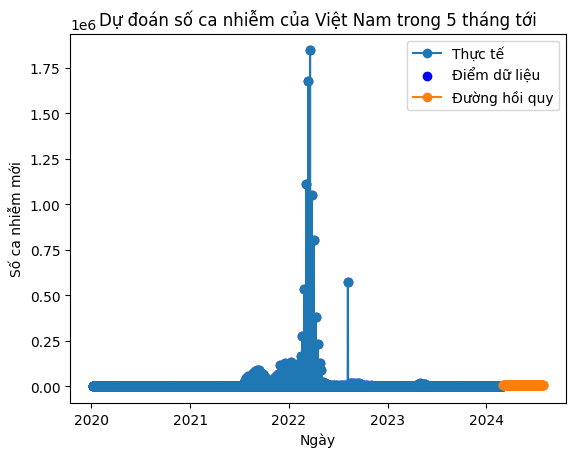

In [6]:
# Bước 4: Vẽ biểu đồ từ mô hình dự đoán
plt.plot(vietnam_data.index, vietnam_data['new_cases'], label='Thực tế',marker='o')
plt.scatter(vietnam_data.index, vietnam_data['new_cases'], color='blue', label='Điểm dữ liệu', marker='o')
plt.plot(predicted_data.index, predicted_data['new_cases'], label='Đường hồi quy',marker='o')
plt.title('Dự đoán số ca nhiễm của Việt Nam trong 5 tháng tới')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.legend()
plt.show()

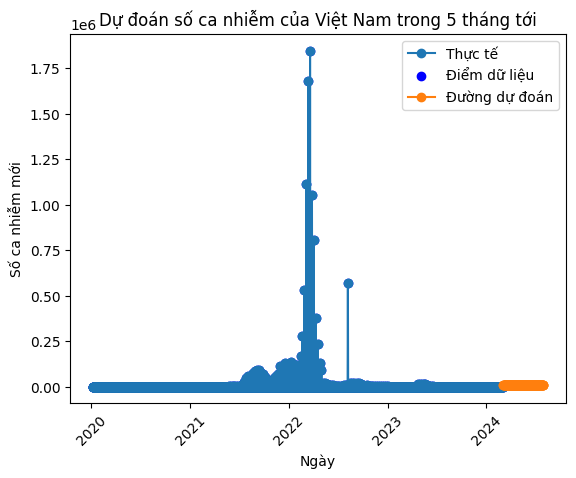

In [1]:
#Phần a-2
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Bước 1: Thu thập và chuẩn bị dữ liệu
data = pd.read_csv('owid-covid-data.csv')
vietnam_data = data[data['location'] == 'Vietnam'][['date', 'new_cases']]
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])
vietnam_data.set_index('date', inplace=True)

train_data = vietnam_data[:-30]
test_data = vietnam_data[-30:]

# chuyển các giá trị trống thành giá trị mean của cột
mean_value = vietnam_data['new_cases'].mean()
vietnam_data['new_cases'].fillna(mean_value, inplace=True)

# Bước 2: Xây dựng mô hình hồi quy tuyến tính
X_train = np.array(range(len(train_data)))[:, np.newaxis]
y_train = train_data['new_cases'].values
X_test = np.array(range(len(train_data), len(train_data)+len(test_data)))[:, np.newaxis]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Bước 3: Dự đoán số ca nhiễm trong 5 tháng tới
n_days = 150
next_days = pd.date_range(start=vietnam_data.index[-1]+timedelta(days=1), end=vietnam_data.index[-1]+timedelta(days=n_days))
X_next_days = np.array(range(len(vietnam_data), len(vietnam_data)+n_days))[:, np.newaxis]
predicted_cases = regressor.predict(X_next_days)
predicted_data = pd.DataFrame({'date': next_days, 'new_cases': predicted_cases})
predicted_data.set_index('date', inplace=True)

# Bước 4: Vẽ biểu đồ từ mô hình dự đoán
plt.plot(vietnam_data.index, vietnam_data['new_cases'], label='Thực tế', marker='o')
plt.scatter(vietnam_data.index, vietnam_data['new_cases'], color='blue', label='Điểm dữ liệu', marker='o')
plt.plot(predicted_data.index, predicted_data['new_cases'], label='Đường dự đoán', marker='o')
plt.title('Dự đoán số ca nhiễm của Việt Nam trong 5 tháng tới')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Độ chính xác trên tập kiểm tra: 1.0
Số ca nhiễm dự đoán trong 5 tháng tới: [266350. 266350. 266350. 266350. 266350.]
Số ca nhiễm dự đoán trong 10 tháng tới: [266350. 266350. 266350. 266350. 266350. 266350. 266350. 266350. 266350.
 266350.]


<ipython-input-68-82b741eb22b4>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'total_cases': future_prediction[0],
<ipython-input-68-82b741eb22b4>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'total_cases': future_prediction[0],
<ipython-input-68-82b741eb22b4>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'total_cases': future_prediction[0],
<ipython-input-68-82b741eb22b4>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'total_cases': future_prediction[0],
<ipython-input-68-82b741eb22b4>:

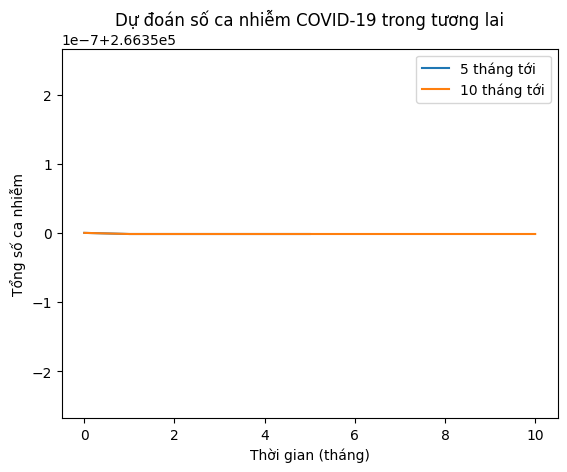

Root Mean Squared Error (RMSE): 9.954772029411406e-09
R-squared (R2): 1.0


In [ ]:
#phần a-3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Chọn các tính năng và biến mục tiêu
X = data[['total_cases', 'total_deaths', 'total_tests']]  # Features
y = data['total_cases']  # Target variable

# Loại bỏ các mẫu có giá trị NaN trong biến mục tiêu
X = X.dropna(subset=['total_cases'])
y = y.dropna()

# Xử lý giá trị thiếu bằng phương pháp imputation cho các tính năng
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Xây dựng mô hình tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
print("Độ chính xác trên tập kiểm tra:", model.score(X_test, y_test))

# Dự đoán số ca nhiễm trong 5 và 10 tháng tới
future_months = [5, 10]
for month in future_months:
    future_data = pd.DataFrame({'total_cases': [y.iloc[-1]], 'total_deaths': [data['total_deaths'].iloc[-1]],
                                'total_tests': [data['total_tests'].iloc[-1]]})
    for i in range(month):
        future_prediction = model.predict(imputer.transform(future_data))
        future_data = future_data.append({'total_cases': future_prediction[0],
                                          'total_deaths': future_data['total_deaths'].iloc[-1],
                                          'total_tests': future_data['total_tests'].iloc[-1]},
                                         ignore_index=True)

    print(f"Số ca nhiễm dự đoán trong {month} tháng tới:", future_prediction)

    # Vẽ biểu đồ từ mô hình dự đoán
    plt.plot(range(len(future_data)), future_data['total_cases'], label=f'{month} tháng tới')

plt.xlabel('Thời gian (tháng)')
plt.ylabel('Tổng số ca nhiễm')
plt.title('Dự đoán số ca nhiễm COVID-19 trong tương lai')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Tính toán R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared (R2):", r_squared)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('owid-covid-data.csv')
# Lấy dữ liệu cho quốc gia Việt Nam
data_vn = data[data['iso_code'] == 'VNM']

# Chọn các đặc trưng quan tâm
features = ['total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_vaccinations_smoothed']

# Xóa các dòng chứa giá trị thiếu
data_vn.dropna(subset=features, inplace=True)

<ipython-input-9-e20286f29858>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn.dropna(subset=features, inplace=True)


In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data, train_labels, test_labels = train_test_split(data_vn[features], data_vn['total_cases'], test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data, train_labels)

# Dự đoán số ca nhiễm trong tương lai với tập kiểm tra
predictions = model.predict(test_data)

In [ ]:
# Đánh giá hiệu suất mô hình bằng RMSE vàR-squared
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
r_squared = r2_score(test_labels, predictions)
print('RMSE:', rmse)
print('R-squared:', r_squared)

# Dự đoán số ca nhiễm hoặc số ca tử vong trong tương lai từ các đặc trưng mới
new_features = np.array([1000, 20, 50, 1, 5000]).reshape(1, -1)
new_predictions = model.predict(new_features)
print('New predictions:', new_predictions)

RMSE: 1.128716869068225e-09
R-squared: 1.0
New predictions: [1000.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


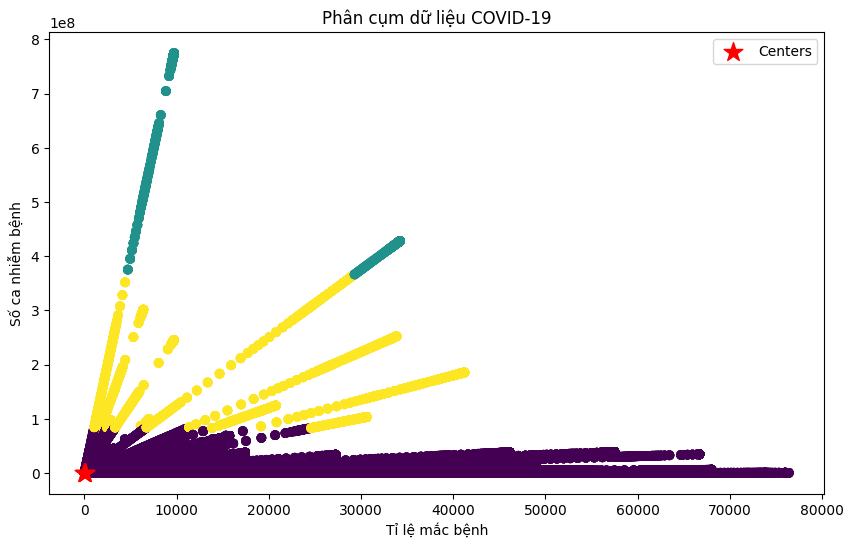

Silhouette Score: 0.9621883064317128


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/owid-covid-data.csv')

# Calculate the incidence rate (number of cases per 100,000 population)
df['incidence_rate'] = df['total_cases'] / df['population'] * 100000

# Select the relevant features for clustering
X = df[['total_cases', 'incidence_rate']].dropna()

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit KMeans to the data
kmeans.fit(X)

# Get cluster labels and silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)

# Visualize the results with scatter plot
plt.figure(figsize=(10, 6))  # Đặt kích thước của biểu đồ

# Vẽ biểu đồ phân tán
plt.scatter(X['incidence_rate'], X['total_cases'], c=labels, marker='o', cmap='viridis', alpha=0.8)

# Vẽ các điểm trung tâm cụm
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='red', label='Centers')

# Đặt nhãn cho trục x và y
plt.xlabel('Tỉ lệ mắc bệnh')
plt.ylabel('Số ca nhiễm bệnh')

# Đặt tiêu đề cho biểu đồ
plt.title('Phân cụm dữ liệu COVID-19')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

print("Silhouette Score:", silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


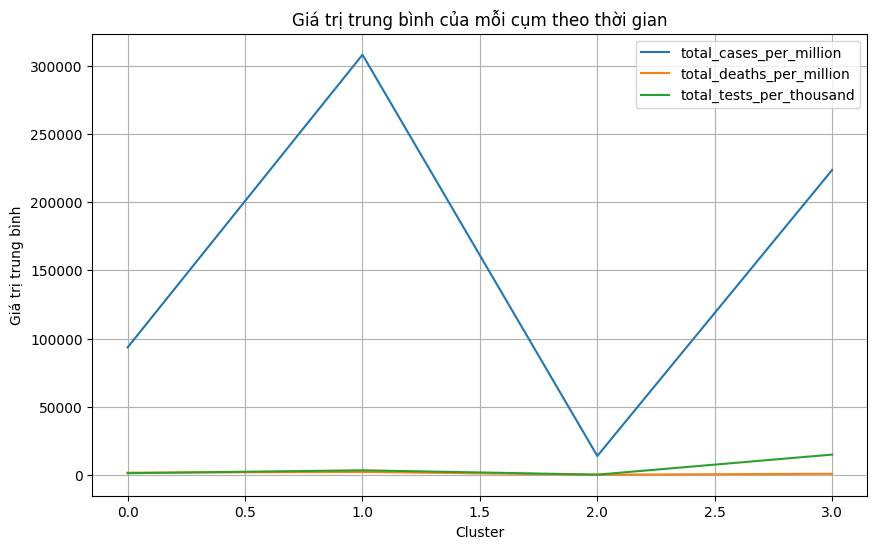

Streaming output truncated to the last 5000 lines.
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Emirates, Nhãn cụm: 3
Quốc gia hoặc khu vực: United Arab Em

In [ ]:
#Phần b
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Chọn các đặc trưng quan trọng
features = ['total_cases_per_million', 'total_deaths_per_million', 'total_tests_per_thousand']

# Loại bỏ các mẫu có giá trị NaN trong các đặc trưng quan trọng
data = data.dropna(subset=features)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Áp dụng thuật toán phân cụm K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Gán nhãn cho từng quốc gia hoặc khu vực
data['cluster'] = kmeans.labels_

# Tạo DataFrame mới để lưu trữ thông tin về giá trị trung bình của mỗi cụm qua thời gian
cluster_data_mean = pd.DataFrame(columns=features)
for cluster in sorted(data['cluster'].unique()):
    cluster_data = data[data['cluster'] == cluster]
    cluster_data_mean.loc[cluster] = cluster_data[features].mean()

# Vẽ biểu đồ đường cho giá trị trung bình của mỗi cụm qua thời gian
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(cluster_data_mean.index, cluster_data_mean[feature], label=feature)
plt.xlabel('Cluster')
plt.ylabel('Giá trị trung bình')
plt.title('Giá trị trung bình của mỗi cụm theo thời gian')
plt.legend()
plt.grid(True)
plt.show()

# Đánh giá chất lượng của phân cụm
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
davies_bouldin_idx = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_idx}')

# In ra nhãn của từng quốc gia hoặc khu vực
for country, label in zip(data['location'], kmeans.labels_):
    print(f'Quốc gia hoặc khu vực: {country}, Nhãn cụm: {label}')

# In ra thông tin về các quốc gia hoặc khu vực trong mỗi cụm
for cluster in sorted(data['cluster'].unique()):
    cluster_countries = data[data['cluster'] == cluster]['location'].unique()
    print(f'Cụm {cluster}: {", ".join(cluster_countries)}')






In [ ]:
# Đánh giá chất lượng của phân cụm
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
davies_bouldin_idx = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_idx}')

Silhouette Score: 0.594905754516283
Davies-Bouldin Index: 0.865736967543063


In [ ]:
#Phần c
import pandas as pd
from textblob import TextBlob

# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('/content/owid-covid-data.csv')

# Lấy các trường dữ liệu liên quan đến Covid-19
data = df[['location', 'date', 'total_cases', 'total_deaths', 'population']]

# Tạo một trường mới chứa các cảm nhận của người dùng về Covid-19
data['sentiment'] = ""

# Các đoạn văn bản ví dụ
positive_text = "Chính phủ đã thực hiện các biện pháp nghiêm ngặt để kiểm soát sự lây lan của Covid-19. Các chiến dịch tiêm chủng đang tiến triển tốt và số ca mắc mới đang giảm. Chúng tôi lạc quan về việc sớm vượt qua cuộc khủng hoảng này."
negative_text = "Tình hình dịch bệnh Covid-19 ở nước ta rất nghiêm trọng. Các bệnh viện quá tải và thiếu nguồn cung cấp y tế. Phản ứng của chính phủ chậm và không hiệu quả, dẫn đến số người chết cao."
neutral_text = "Đại dịch COVID-19 tiếp tục ảnh hưởng đến cuộc sống hàng ngày của chúng ta. Chúng ta phải thận trọng và tuân theo các hướng dẫn an toàn để bảo vệ bản thân và những người khác. Điều quan trọng là phải luôn cập nhật thông tin và hành động có trách nhiệm trong thời điểm thử thách này"

# Phân tích tình cảm cho mỗi đoạn văn bản và lưu kết quả vào trường sentiment
for i, row in data.iterrows():
    # Chọn đoạn văn bản dựa trên số ca nhiễm
    total_cases = row['total_cases']
    if total_cases > 1000000:
        text = positive_text
    elif total_cases < 1000:
        text = negative_text
    else:
        text = neutral_text

    # Phân tích tình cảm của đoạn văn bản sử dụng TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity

    # Xác định tình cảm của đoạn văn bản và lưu vào trường sentiment
    if sentiment > 0:
        data.at[i, 'sentiment'] = "positive"
    elif sentiment < 0:
        data.at[i, 'sentiment'] = "negative"
    else:
        data.at[i, 'sentiment'] = "neutral"

# Hiển thị dữ liệu đã phân tích tình cảm
print(data)

<ipython-input-1-d735f0fae284>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = ""


           location        date  total_cases  total_deaths  population  \
0       Afghanistan  2020-01-05          NaN           NaN  41128772.0   
1       Afghanistan  2020-01-06          NaN           NaN  41128772.0   
2       Afghanistan  2020-01-07          NaN           NaN  41128772.0   
3       Afghanistan  2020-01-08          NaN           NaN  41128772.0   
4       Afghanistan  2020-01-09          NaN           NaN  41128772.0   
...             ...         ...          ...           ...         ...   
380400     Zimbabwe  2024-02-14     266328.0        5737.0  16320539.0   
380401     Zimbabwe  2024-02-15     266328.0        5737.0  16320539.0   
380402     Zimbabwe  2024-02-16     266328.0        5737.0  16320539.0   
380403     Zimbabwe  2024-02-17     266328.0        5737.0  16320539.0   
380404     Zimbabwe  2024-02-18     266350.0        5737.0  16320539.0   

       sentiment  
0        neutral  
1        neutral  
2        neutral  
3        neutral  
4        neutral

In [ ]:
# Tạo một trường mới chứa các cảm nhận của người dùng về Covid-19
data['sentiment'] = data['total_cases'].apply(lambda x: "positive" if x > 1000000 else ("negative" if x < 1000 else "neutral"))

# Đếm số lượng phản ứng tích cực, tiêu cực và trung lập
sentiment_counts = data['sentiment'].value_counts()

# In ra kết quả
print("Số phản ứng tích cực:", sentiment_counts['positive'])
print("Số phản ứng tiêu cực:", sentiment_counts['negative'])
print("Số phản ứng trung lập:", sentiment_counts['neutral'])


Số phản ứng tích cực: 79856
Số phản ứng tiêu cực: 38413
Số phản ứng trung lập: 262136


<ipython-input-3-e090148b0380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['total_cases'].apply(lambda x: "positive" if x > 1000000 else ("negative" if x < 1000 else "neutral"))


Độ chính xác trên tập kiểm tra: -0.36873529760808865


<ipython-input-46-8747386bbf83>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['total_cases'] += future_prediction
<ipython-input-46-8747386bbf83>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['total_cases'] += future_prediction
<ipython-input-46-8747386bbf83>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

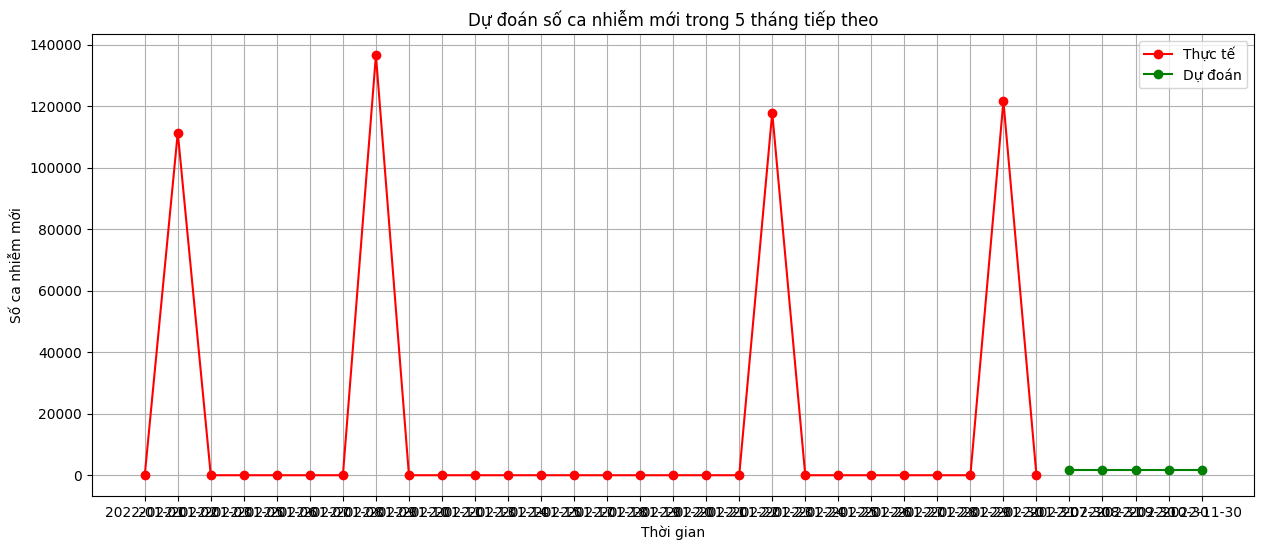

In [46]:
#phần d-1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu cho Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Chọn các tính năng quan trọng và biến mục tiêu
features = ['total_cases', 'total_deaths', 'total_tests']
target = 'new_cases'

# Loại bỏ các mẫu có giá trị NaN trong các đặc trưng và biến mục tiêu
vietnam_data = vietnam_data.dropna(subset=features + [target])

# Chuẩn bị dữ liệu
X = vietnam_data[features]
y = vietnam_data[target]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
print("Độ chính xác trên tập kiểm tra:", model.score(X_test, y_test))

# Dự đoán số ca nhiễm mới trong 5 tháng tiếp theo
n_months = 5
future_months = pd.date_range(start=vietnam_data['date'].iloc[-1], periods=n_months+1, freq='M')[1:]
future_data = X.iloc[[-1]]  # Sử dụng dữ liệu của tháng cuối cùng để dự đoán
predicted_cases = []
for _ in range(n_months):
    future_prediction = model.predict(future_data)
    predicted_cases.append(future_prediction[0])
    future_data['total_cases'] += future_prediction

# Tạo DataFrame cho dự đoán
predicted_dates = pd.date_range(start=vietnam_data['date'].iloc[-1], periods=n_months, freq='M') + pd.DateOffset(months=1)
predicted_data = pd.DataFrame({'date': predicted_dates, 'new_cases': predicted_cases})
predicted_data.set_index('date', inplace=True)

# Chuyển đổi cột thời gian sang chuỗi
predicted_data['date'] = predicted_data.index.strftime('%Y-%m-%d')



# Chuyển cột 'date' sang kiểu datetime
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])

# Lọc dữ liệu cho các tháng 1 và 7 từ năm 2020 đến năm 2024
filtered_data = vietnam_data[((vietnam_data['date'].dt.month == 1) | (vietnam_data['date'].dt.month == 7))
                             & ((vietnam_data['date'].dt.year >= 2020) & (vietnam_data['date'].dt.year <= 2024))]

# Chuyển đổi cột 'date' thành chuỗi
filtered_data['date'] = filtered_data['date'].dt.strftime('%Y-%m-%d')

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(15, 6))
plt.plot(filtered_data['date'], filtered_data['new_cases'], label='Thực tế', marker='o', color='red')  # Đường thực tế màu đỏ
plt.plot(predicted_data.index.strftime('%Y-%m-%d'), predicted_data['new_cases'], label='Dự đoán', marker='o', color='green')  # Đường dự đoán màu xanh
plt.xlabel('Thời gian')
plt.ylabel('Số ca nhiễm mới')
plt.title('Dự đoán số ca nhiễm mới trong 5 tháng tiếp theo')
plt.legend()
plt.grid(True)
plt.show()






Độ chính xác trên tập kiểm tra: -0.36873529760808865


<ipython-input-49-96785032059d>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['total_cases'] += future_prediction
<ipython-input-49-96785032059d>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['total_cases'] += future_prediction
<ipython-input-49-96785032059d>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

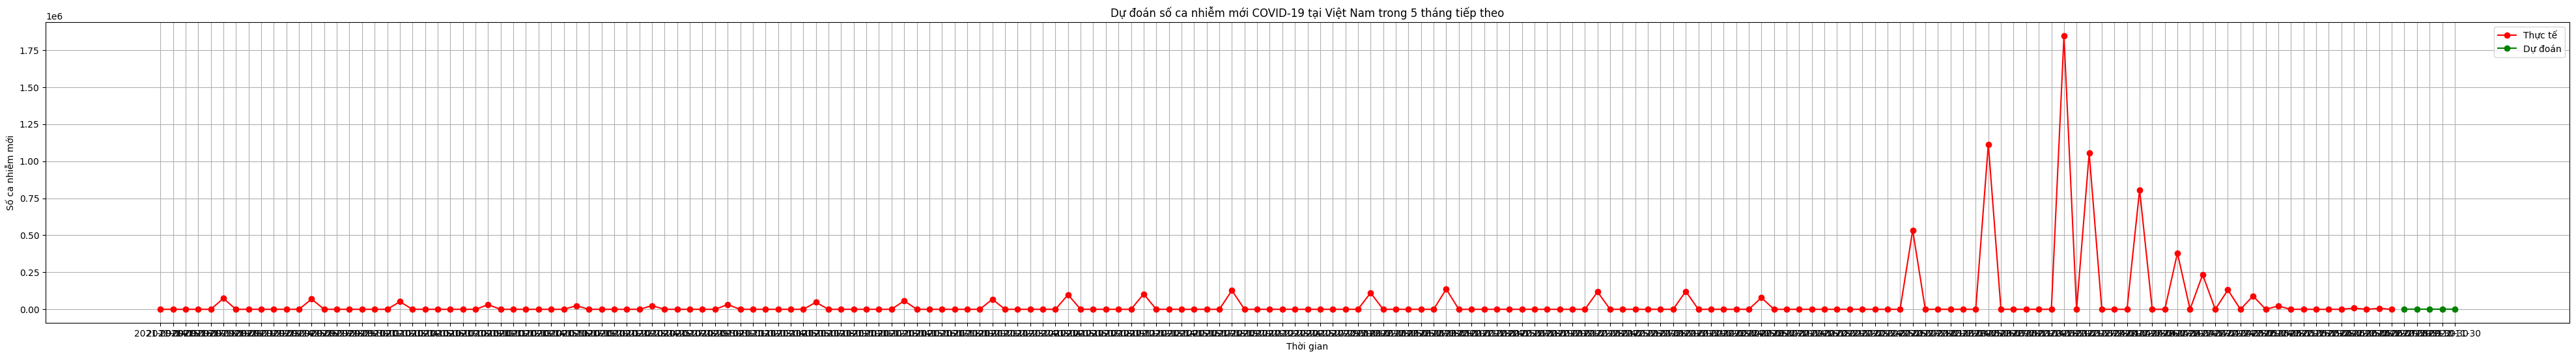

In [49]:
#phần d-2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu cho Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Chọn các tính năng quan trọng và biến mục tiêu
features = ['total_cases', 'total_deaths', 'total_tests']
target = 'new_cases'

# Loại bỏ các mẫu có giá trị NaN trong các đặc trưng và biến mục tiêu
vietnam_data = vietnam_data.dropna(subset=features + [target])

# Chuẩn bị dữ liệu
X = vietnam_data[features]
y = vietnam_data[target]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
print("Độ chính xác trên tập kiểm tra:", model.score(X_test, y_test))

# Dự đoán số ca nhiễm mới trong 5 tháng tiếp theo
n_months = 5
future_months = pd.date_range(start=vietnam_data['date'].iloc[-1], periods=n_months+1, freq='M')[1:]
future_data = X.iloc[[-1]]  # Sử dụng dữ liệu của tháng cuối cùng để dự đoán
predicted_cases = []
for _ in range(n_months):
    future_prediction = model.predict(future_data)
    predicted_cases.append(future_prediction[0])
    future_data['total_cases'] += future_prediction

# Tạo DataFrame cho dự đoán
predicted_dates = pd.date_range(start=vietnam_data['date'].iloc[-1], periods=n_months, freq='M') + pd.DateOffset(months=1)
predicted_data = pd.DataFrame({'date': predicted_dates, 'new_cases': predicted_cases})
predicted_data.set_index('date', inplace=True)

# Chuyển đổi cột thời gian sang chuỗi
predicted_data['date'] = predicted_data.index.strftime('%Y-%m-%d')

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(50, 6))
plt.plot(vietnam_data['date'], vietnam_data['new_cases'], label='Thực tế', marker='o', color='red')  # Đường thực tế màu đỏ
plt.plot(predicted_data['date'], predicted_data['new_cases'], label='Dự đoán', marker='o', color='green')  # Đường dự đoán màu xanh
plt.xlabel('Thời gian')
plt.ylabel('Số ca nhiễm mới')
plt.title('Dự đoán số ca nhiễm mới COVID-19 tại Việt Nam trong 5 tháng tiếp theo')
plt.legend()
plt.grid(True)
plt.show()


Độ chính xác trên tập kiểm tra: -0.36873529760808865


<ipython-input-50-adf6d2dc077b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['total_cases'] += future_prediction
<ipython-input-50-adf6d2dc077b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['total_cases'] += future_prediction
<ipython-input-50-adf6d2dc077b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

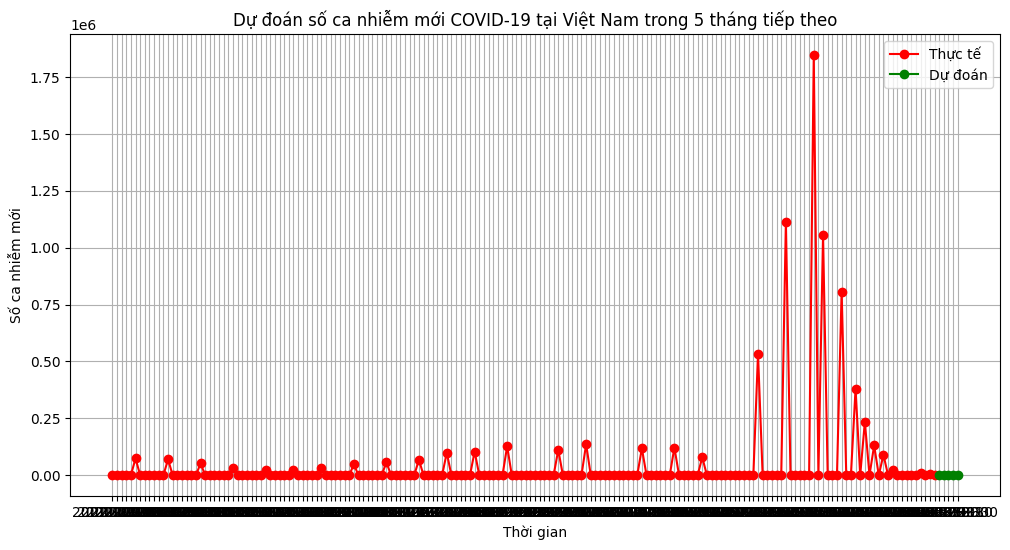

In [50]:
#phần d-
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('owid-covid-data.csv')

# Lọc dữ liệu cho Việt Nam
vietnam_data = data[data['location'] == 'Vietnam']

# Chọn các tính năng quan trọng và biến mục tiêu
features = ['total_cases', 'total_deaths', 'total_tests']
target = 'new_cases'

# Loại bỏ các mẫu có giá trị NaN trong các đặc trưng và biến mục tiêu
vietnam_data = vietnam_data.dropna(subset=features + [target])

# Chuẩn bị dữ liệu
X = vietnam_data[features]
y = vietnam_data[target]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
print("Độ chính xác trên tập kiểm tra:", model.score(X_test, y_test))

# Dự đoán số ca nhiễm mới trong 5 tháng tiếp theo
n_months = 5
future_months = pd.date_range(start=vietnam_data['date'].iloc[-1], periods=n_months+1, freq='M')[1:]
future_data = X.iloc[[-1]]  # Sử dụng dữ liệu của tháng cuối cùng để dự đoán
predicted_cases = []
for _ in range(n_months):
    future_prediction = model.predict(future_data)
    predicted_cases.append(future_prediction[0])
    future_data['total_cases'] += future_prediction

# Tạo DataFrame cho dự đoán
predicted_dates = pd.date_range(start=vietnam_data['date'].iloc[-1], periods=n_months, freq='M') + pd.DateOffset(months=1)
predicted_data = pd.DataFrame({'date': predicted_dates, 'new_cases': predicted_cases})
predicted_data.set_index('date', inplace=True)

# Chuyển đổi cột thời gian sang chuỗi
predicted_data['date'] = predicted_data.index.strftime('%Y-%m-%d')

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(12, 6))
plt.plot(vietnam_data['date'], vietnam_data['new_cases'], label='Thực tế', marker='o', color='red')  # Đường thực tế màu đỏ
plt.plot(predicted_data['date'], predicted_data['new_cases'], label='Dự đoán', marker='o', color='green')  # Đường dự đoán màu xanh
plt.xlabel('Thời gian')
plt.ylabel('Số ca nhiễm mới')
plt.title('Dự đoán số ca nhiễm mới COVID-19 tại Việt Nam trong 5 tháng tiếp theo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

##MÔ HÌNH QUÁ Ư LÀ TỆ :<<

Mean Absolute Error (MAE): 73175.34777777777
Mean Squared Error (MSE): 46164530471.23269
R-squared (R2): -0.36873529760808865
